<a href="https://colab.research.google.com/github/AnasGamal/big-data-notes-fall-2025/blob/main/003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Started on 9/8/2025
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import os
warnings.filterwarnings('ignore')

In [4]:
# Import CSV Data as Pandas DataFrame
if os.path.isfile('data/003-stud.csv'):
  df = pd.read_csv('data/003-stud.csv')
else:
  df = pd.read_csv('https://raw.githubusercontent.com/AnasGamal/big-data-notes-fall-2025/refs/heads/main/data/003-stud.csv')

In [5]:
# Show top 5 records
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# Dataset Shape
df.shape

(1000, 8)

In [7]:
# Check missing values
df.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [8]:
# Check Duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
# Check Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
#Checking unique values for each column

df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [11]:
# Check stats of data

df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
# Data Exploration

print("Categories in 'gender' variable:                      ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:              ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:                       ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:                       ['female' 'male']
Categories in 'race/ethnicity' variable:               ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:                        ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [13]:

# Define numerical and categorical features
numeric_featues = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_featues = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_featues),numeric_featues));
print('We have {} categorical features : {}'.format(len(categorical_featues),categorical_featues))

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [14]:
# Calculating total and average of scores

df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
# Getting student count with full marks

reading_full = df[df['reading score']==100]['reading score'].count()
writing_full = df[df['writing score']==100]['reading score'].count()
math_full = df[df['math score']==100]['reading score'].count()

print('Number of students with 100 in Maths: {}'.format(math_full))
print('Number of students with 100 in Reading: {}'.format(reading_full))
print('Number of students with 100 in Writing: {}'.format(writing_full))

Number of students with 100 in Maths: 7
Number of students with 100 in Reading: 17
Number of students with 100 in Writing: 14


In [16]:
# Getting student count with failing marks

fail_score = 34
reading_fail = df[df['reading score']<=fail_score]['reading score'].count()
writing_fail = df[df['writing score']<=fail_score]['reading score'].count()
math_fail = df[df['math score']<=fail_score]['reading score'].count()

print('Number of students with fail in Maths: {}'.format(math_fail))
print('Number of students with fail in Reading: {}'.format(reading_fail))
print('Number of students with fail in Writing: {}'.format(writing_fail))

Number of students with fail in Maths: 22
Number of students with fail in Reading: 15
Number of students with fail in Writing: 17


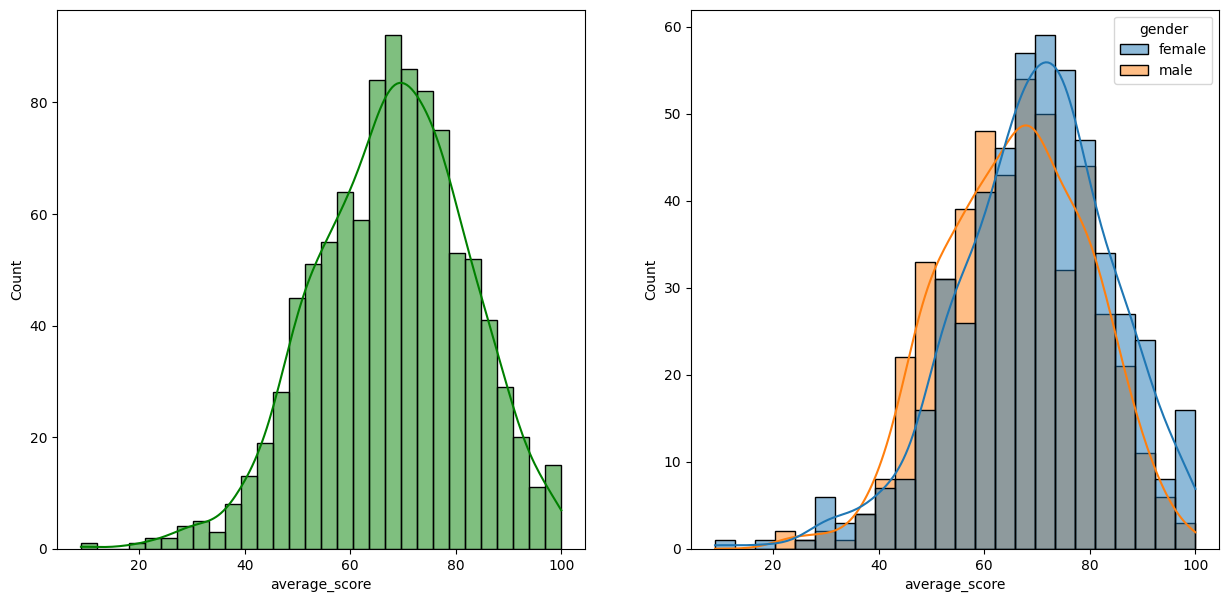

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()